<a href="https://colab.research.google.com/github/vale314/A2/blob/master/Challenge02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingresar nuestro data-set

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# Graficos embebidos.
%matplotlib inline

In [48]:
import numpy as np #importando numpy
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns # importando seaborn

# parámetros estéticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [54]:
# Trabajando con una ruta relativa
path = './drive/MyDrive/CUCEI/ML-COURSE-JUAN/Students/' 

# Colocamos en una variable el archivo a trabajar
archivo = 'StudentsPerformance1.csv'

--- 
#### Solo correr para comprobar archivos

In [55]:
# Paquete requerido para listar los archivos del directorio
from os import listdir

In [56]:
import pandas as pd

In [57]:
Files = []
for File in listdir(path):
    # Escribir la RUTA COMPLETA de cada archivo
    Files.append(File)

In [58]:
# Mostramos los archivos del directorio que hemos decidido trabajar
Files

['StudentsPerformance.csv',
 'StudentsPerformance.gsheet',
 'StudentsPerformance1.csv']

---


### Abrir Archivo

In [86]:
df = pd.read_csv(path+archivo, index_col=0)

In [87]:
df.shape

(1000, 8)

##### La forma de nuestro data set es de 1000c x 7f

### Ver los datos

In [88]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
NaN,female,group B,bachelor's degree,standard,none,72,72,74
NaN,female,group C,some college,standard,completed,69,90,88
NaN,female,group B,master's degree,standard,none,90,95,93
NaN,male,group A,associate's degree,free/reduced,none,47,57,44
NaN,male,group C,some college,standard,none,76,78,75


### Ver Estado De Datos

In [62]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


##### Los datos Race/Ethicity son: 1000, unicos: 5, el mas usado es group c con una frecuencia de 319, para todos NaN son categoricos.

### Mostrar todos los columnas


In [63]:
for c in df.columns:
  print(c)

gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score


---

### Histograma de  Lunch

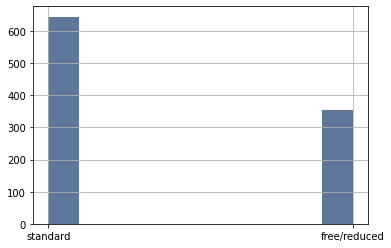

In [ ]:
df['lunch'].hist()

### Histograma De Math Score [Discretizacion]

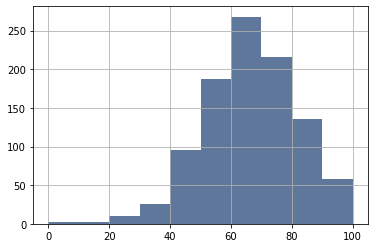

In [ ]:
df['math score'].hist()

In [ ]:
pd.qcut(df['ext price'], q=4)


### Histograma De Race

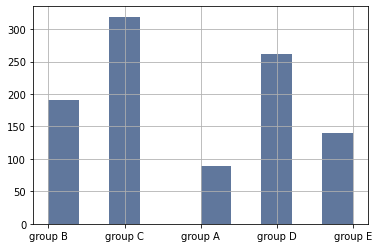

In [ ]:
df['race/ethnicity'].hist()

### Histograma de Preparacion

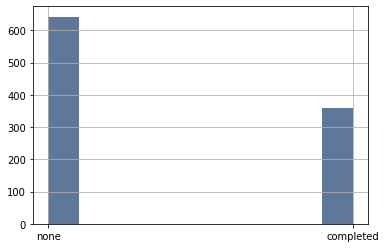

In [ ]:
df['test preparation course'].hist()

### Histograma De Reading Score [Discretizacion (20)]

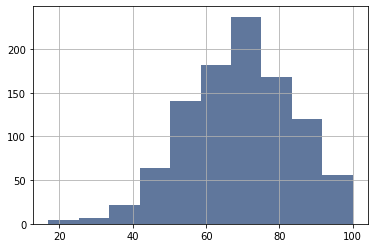

In [ ]:
df['reading score'].hist()

### Histograma De Parental Level Of Education

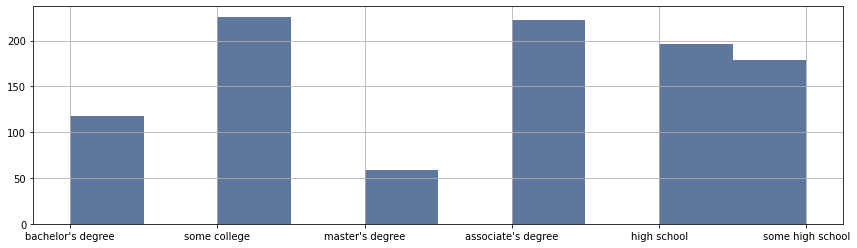

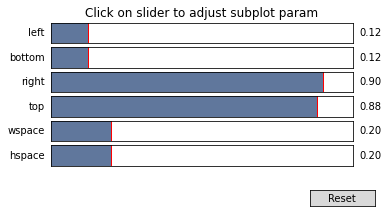

In [ ]:
plt.subplot_tool()
plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=3, hspace=4)
df['parental level of education'].hist()

### Histograma Writing Score [Discretizacion (20)]

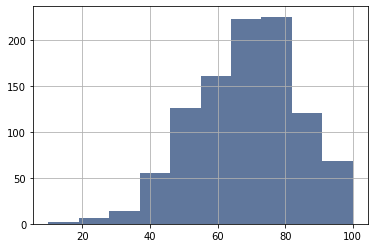

In [ ]:
df['writing score'].hist()

---

### Diagrama De Dispersión 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03f65488d0>,
      dtype=object)

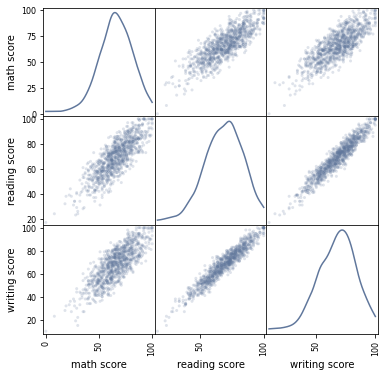

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

###Crear Nuevo DataFrama con Discretizacion




In [68]:
dfC = pd.DataFrame()

In [71]:
dfC['race/ethnicity'] = df['race/ethnicity']
dfC['parental level of education'] = df['parental level of education']
dfC['lunch'] = df['lunch']
dfC['test preparation course'] = df['test preparation course']
dfC['gender'] = df['gender']

In [72]:
dfC['math score'] = pd.qcut(df['math score'], q=4)
dfC['reading score'] = pd.qcut(df['reading score'], q=4)
dfC['writing score'] = pd.qcut(df['writing score'], q=4)

dfC.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender
NaN,group B,bachelor's degree,standard,none,"(66.0, 77.0]","(70.0, 79.0]","(69.0, 79.0]",female
NaN,group C,some college,standard,completed,"(66.0, 77.0]","(79.0, 100.0]","(79.0, 100.0]",female
NaN,group B,master's degree,standard,none,"(77.0, 100.0]","(79.0, 100.0]","(79.0, 100.0]",female
NaN,group A,associate's degree,free/reduced,none,"(-0.001, 57.0]","(16.999, 59.0]","(9.999, 57.75]",male
NaN,group C,some college,standard,none,"(66.0, 77.0]","(70.0, 79.0]","(69.0, 79.0]",male


## Crear Nuevo DataFrame Con Generalizacion

In [97]:
dfG = df.copy()

In [98]:
dfG.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
NaN,female,group B,bachelor's degree,standard,none,72,72,74
NaN,female,group C,some college,standard,completed,69,90,88
NaN,female,group B,master's degree,standard,none,90,95,93
NaN,male,group A,associate's degree,free/reduced,none,47,57,44
NaN,male,group C,some college,standard,none,76,78,75


In [125]:
dfG = pd.get_dummies(dfC, columns=["race/ethnicity"])
dfG = pd.get_dummies(dfG, columns=["gender"])
dfG = pd.get_dummies(dfG, columns=["parental level of education"])
dfG = pd.get_dummies(dfG, columns=["lunch"])
dfG = pd.get_dummies(dfG, columns=["test preparation course"])
dfG = dfG.drop('math score', axis = 1)
dfG = dfG.drop('reading score', axis = 1)
dfG = dfG.drop('writing score', axis = 1)

In [129]:
dfG['math score'] = df['math score']
dfG['reading score'] = df['reading score']
dfG['writing score'] = df['writing score']

In [130]:
dfG.head()

,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,math score,reading score,writing score
NaN,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,72,72,74
NaN,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,69,90,88
NaN,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,90,95,93
NaN,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,47,57,44
NaN,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,76,78,75


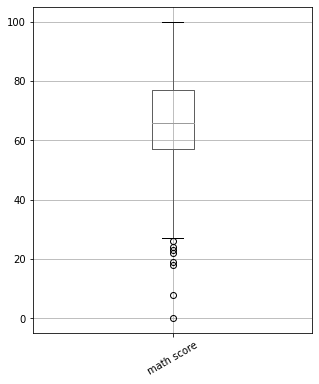

In [131]:
dfG.boxplot('math score',rot = 30,figsize=(5,6))

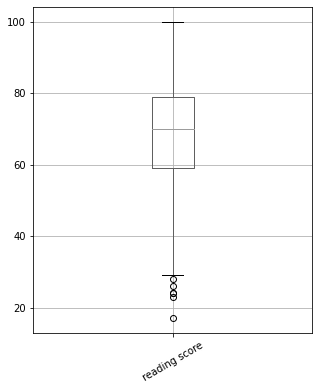

In [137]:
dfG.boxplot('reading score',rot = 30,figsize=(5,6))

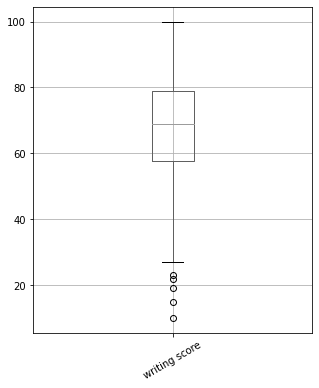

In [138]:
dfG.boxplot('writing score',rot = 30,figsize=(5,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2284645a90>,
      dtype=object)

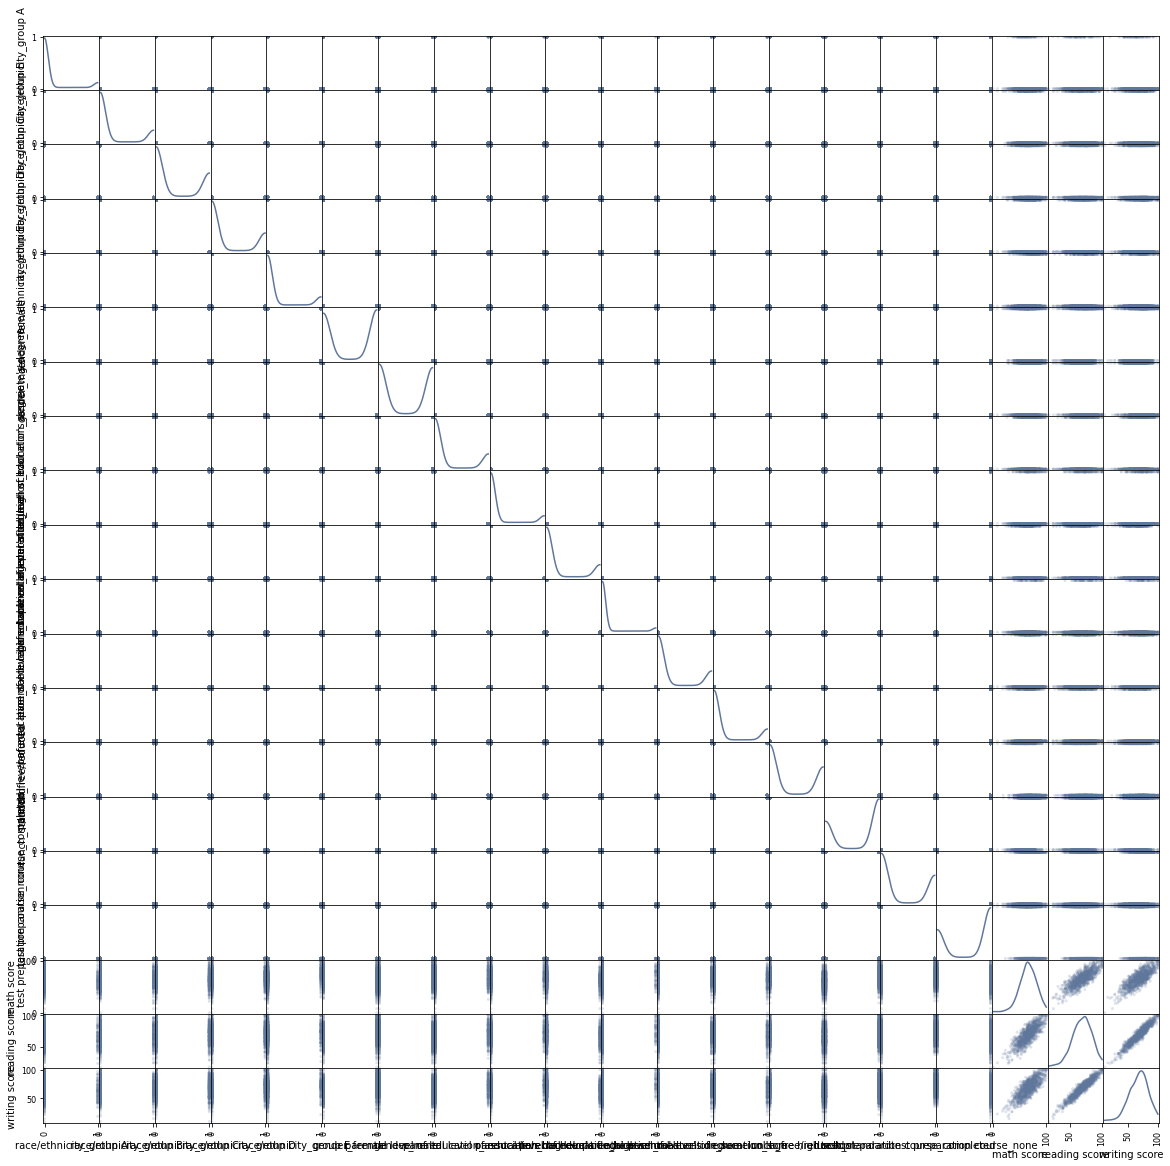

In [136]:
from pandas.plotting import scatter_matrix

scatter_matrix(dfG, alpha=0.2, figsize=(20, 20), diagonal='kde')

##Obtener la Media Aritemica  Promedio

In [139]:
dfG.mean()

race/ethnicity_group A                             0.089
race/ethnicity_group B                             0.190
race/ethnicity_group C                             0.319
race/ethnicity_group D                             0.262
race/ethnicity_group E                             0.140
gender_female                                      0.518
gender_male                                        0.482
parental level of education_associate's degree     0.222
parental level of education_bachelor's degree      0.118
parental level of education_high school            0.196
parental level of education_master's degree        0.059
parental level of education_some college           0.226
parental level of education_some high school       0.179
lunch_free/reduced                                 0.355
lunch_standard                                     0.645
test preparation course_completed                  0.358
test preparation course_none                       0.642
math score                     

##Obetner La Descivion Estandar 

#### Cuanto varian los datos de la media

In [140]:
dfG.std()

race/ethnicity_group A                             0.284886
race/ethnicity_group B                             0.392497
race/ethnicity_group C                             0.466322
race/ethnicity_group D                             0.439943
race/ethnicity_group E                             0.347161
gender_female                                      0.499926
gender_male                                        0.499926
parental level of education_associate's degree     0.415799
parental level of education_bachelor's degree      0.322770
parental level of education_high school            0.397167
parental level of education_master's degree        0.235743
parental level of education_some college           0.418448
parental level of education_some high school       0.383544
lunch_free/reduced                                 0.478753
lunch_standard                                     0.478753
test preparation course_completed                  0.479652
test preparation course_none            

### Calcular la varianza de los datos

In [141]:
dfG.var()

race/ethnicity_group A                              0.081160
race/ethnicity_group B                              0.154054
race/ethnicity_group C                              0.217456
race/ethnicity_group D                              0.193550
race/ethnicity_group E                              0.120521
gender_female                                       0.249926
gender_male                                         0.249926
parental level of education_associate's degree      0.172889
parental level of education_bachelor's degree       0.104180
parental level of education_high school             0.157742
parental level of education_master's degree         0.055575
parental level of education_some college            0.175099
parental level of education_some high school        0.147106
lunch_free/reduced                                  0.229204
lunch_standard                                      0.229204
test preparation course_completed                   0.230066
test preparation course_